# Polynomial Regression from scratch
*This notebook was created on 27/08/2021*
- Update Previous Linear Regression into Polynomial one.

## Import Libaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Model Definition

In [2]:
class MyRegressionModel:
    def __init__(self, dims, learning_rate=0.05, n_estimators=100, batch_size=-1):
        self.dims = dims
        self.params = self.initial_parameters(self.dims)
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.batch_size = batch_size
    
    def initial_parameters(self, dims):
        np.random.seed(42)
        if type(dims) == int:
            dims = [dims]
        dims = dims + [1]
        params = {}
        for i in range(1, len(dims)):
            params['W'] = np.random.rand(dims[i], dims[i-1])
            params['b'] = np.zeros((dims[i], 1))
        return params
    
    def forward_propagation(self, X):
        params = self.params
        y_hat = np.dot(X, params['W'].T) + params['b']
        return y_hat
    
    def backward_propagation(self, X, y, y_hat):
        grads = {}
        m = X.shape[0]
        
        grads['dW'] = 2/m * np.dot((y_hat - y).T, X)
        grads['db'] = 2/m * np.sum(y_hat - y)
        return grads
    
    def update_params(self, grads):
        learning_rate=self.learning_rate
        params = self.params
        params['W'] = params['W'] - learning_rate*grads['dW']
        params['b'] = params['b'] - learning_rate*grads['db']
        return params
    
    def compute_cost(self, y, y_hat):
        m = y.shape[0]
        cost = 1/m * np.sum((y_hat - y)**2)
        return cost
    
    def fit(self, X, y, batch_size=-1):
        """
        Fit Linear Regression using Gradient Descent
        If - Model Batches size = -1 then Run Batch Gradient Descent
           - Model Batches size = 1  then Run Stochastic Gradient Descent
           - Model Batches size is some other numbers then run Mini-batch Gradient Descent
        Argument:
          -- X: A (m by n) numpy Array (or Matrix somehow) contains the input (features).
          -- y: A (m by 1) numpy Array contains the output (labels).
          -- m is the number of sample in the Trainning set, n is the number of features.
        """
        if (self.batch_size == -1):
            print('Fitting on Full Batch...')
            self.batch_fit(X, y)
        elif (self.batch_size == 1):
            print('Fitting using Stochastic Gradient Descent...')
            self.stochastic_fit(X, y)
        else:
            print('Fitting using Mini-Batch...')
            self.mini_batch_fit(X, y)
    
    def batch_fit(self, X, y):
        for i in range(self.n_estimators):
            y_hat = self.forward_propagation(X)
            curr_cost = self.compute_cost(y, y_hat)
            grads = self.backward_propagation(X, y, y_hat)
            
            self.params = self.update_params(grads)
            
            print('After {} estimators, Cost: {}'.format(i, curr_cost))
    
    def stochastic_fit(self, X, y):
        """
        Fit Linear Regression using Stochastic Gradient Descent (SGD)
        Argument:
          -- X: A (m by n) numpy Array (or Matrix somehow) contains the input (features).
          -- y: A (m by 1) numpy Array contains the output (labels).
          -- m is the number of sample in the Trainning set, n is the number of features.
        """
        for i in range(self.n_estimators):
            for j in range(X.shape[0]):
                X_curr, y_curr = X[j].reshape(1, X[j].shape[0]), y[j]
                y_hat = self.forward_propagation(X_curr)
                curr_cost = self.compute_cost(y_curr, y_hat)
                grads = self.backward_propagation(X_curr, y_curr, y_hat)
                self.params = self.update_params(grads)
                
                print('Epoch {}, After {} estimators, Cost: {}'.format(i, j, curr_cost))
                
    def mini_batch_fit(self, X, y):
        batches = self.mini_batch_split(X.shape[0], self.batch_size)
        for i in range(self.n_estimators):
            for j in range(len(batches)-1):
                batch_start = int(batches[j])
                batch_end = int(batches[j+1]) - 1

                X_curr, y_curr = X[batch_start:batch_end], y[batch_start: batch_end]
                y_hat = self.forward_propagation(X_curr)
                curr_cost = self.compute_cost(y_curr, y_hat)
                grads = self.backward_propagation(X_curr, y_curr, y_hat)
                self.params = self.update_params(grads)
                
                print('Epoch {}, After {} estimators, Cost: {}'.format(i, j, curr_cost))
                
                
    def mini_batch_split(self, m, batch_size=16):
        """
        Helper function, return the range of each mini-batch divided from batch size m
        """
        batches = np.linspace(0, (m // batch_size + 1) * batch_size, m // batch_size + 2)
        batches[-1] = m
        return batches
        
            
    def predict(self, X):
        return X * self.params['W'] + self.params['b']

## Make an artificial Polynomial Dataset

In [3]:
np.random.seed(42)

# Define expected Function
m = 150
X = 6 * np.random.rand(m, 1) - 2
y = 0.5 * X**2 + 0.25*X + 2 + np.random.randn(m, 1)

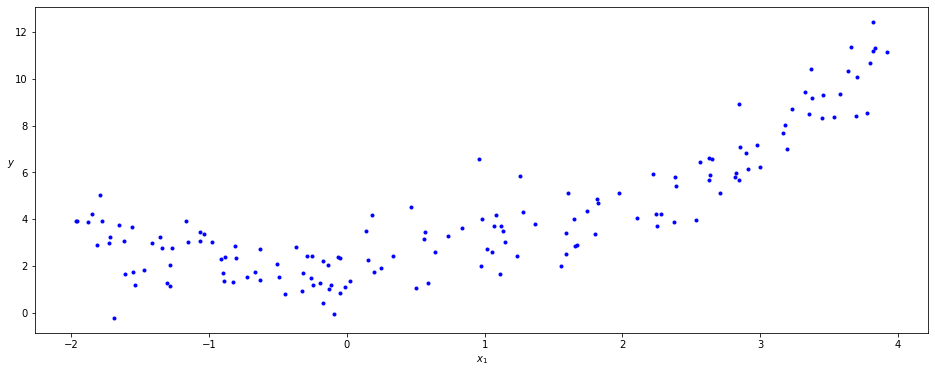

In [4]:
plt.figure(figsize=(16, 6))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
# plt.axis([0, 2, 0, 15])
plt.show()

## Create a New Model

In [5]:
linear_model = MyRegressionModel(X.shape[1])
linear_model.fit(X, y)

Fitting on Full Batch...
After 0 estimators, Cost: 20.226588414464466
After 1 estimators, Cost: 12.02324136522751
After 2 estimators, Cost: 8.69269551734931
After 3 estimators, Cost: 7.140273561095647
After 4 estimators, Cost: 6.2691612390020515
After 5 estimators, Cost: 5.685704823489273
After 6 estimators, Cost: 5.244466416889731
After 7 estimators, Cost: 4.888252151472548
After 8 estimators, Cost: 4.591768610731744
After 9 estimators, Cost: 4.3416991225038615
After 10 estimators, Cost: 4.129591460483292
After 11 estimators, Cost: 3.9492622008777745
After 12 estimators, Cost: 3.7958019169827772
After 13 estimators, Cost: 3.665154964382439
After 14 estimators, Cost: 3.5539115853050545
After 15 estimators, Cost: 3.459183534771859
After 16 estimators, Cost: 3.378516663716633
After 17 estimators, Cost: 3.30982297321904
After 18 estimators, Cost: 3.2513250350469316
After 19 estimators, Cost: 3.2015094627350247
After 20 estimators, Cost: 3.1590875699814895
After 21 estimators, Cost: 3.1229

## Check the Model by Visualization
- Plot the Dataset in Scatter Plot with a Model Linear Line

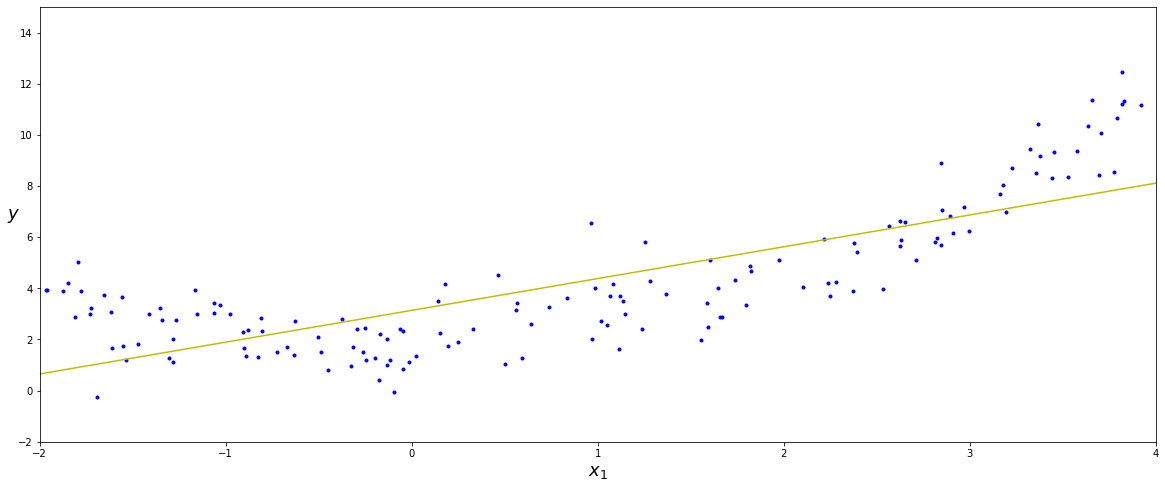

In [6]:
# Load Model's trained Parameters to plot it with the 
W = linear_model.params['W']
b = linear_model.params['b']
X_model = np.linspace(-5, 5, 100).reshape(100, 1) # use X_model to plot the line "naturally" :)

plt.figure(figsize=(20, 8))
plt.plot(X, y, "b.")
plt.plot(X_model, W*X_model + b, c="y", ls='-')


plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-2, 4, -2, 15])
plt.show()

# Conclusion

- The Linear Model Worked poorly here.
- With this dataset, Polynomial Regression Model will shine.

# Build a Polynomial Regression Model
- In order to build a Polynomial Model, we have to make Polynomial Features based on current features first.
- Since we only have 1 feature, this process must be easy for us.

In [7]:
# Define a function for this task, why not?
def polynomial_features(features, degree=2):
    """
    Return a numpy matrix contains normal features (input) and the polynomial features with nth degree.
    """
    poly_features = np.concatenate((features, features ** degree), axis=1)
    
    return poly_features

In [8]:
# Create a new poly dataset based on the original dataset
X_poly = polynomial_features(X)

In [9]:
poly_model = MyRegressionModel(dims=X_poly.shape[1], n_estimators=10, batch_size=1, learning_rate=0.001)

poly_model.fit(X_poly, y)

Fitting using Stochastic Gradient Descent...
Epoch 0, After 0 estimators, Cost: 3.060037883625356
Epoch 0, After 1 estimators, Cost: 18.957349281767435
Epoch 0, After 2 estimators, Cost: 0.022092518947734154
Epoch 0, After 3 estimators, Cost: 0.021311671617942264
Epoch 0, After 4 estimators, Cost: 8.260394485135222
Epoch 0, After 5 estimators, Cost: 6.068788949941642
Epoch 0, After 6 estimators, Cost: 3.9561411292502444
Epoch 0, After 7 estimators, Cost: 7.574221291653159
Epoch 0, After 8 estimators, Cost: 6.479499032799203
Epoch 0, After 9 estimators, Cost: 1.2472475851659581
Epoch 0, After 10 estimators, Cost: 2.7055402286360755
Epoch 0, After 11 estimators, Cost: 0.2835037069354635
Epoch 0, After 12 estimators, Cost: 3.166748864023032
Epoch 0, After 13 estimators, Cost: 1.7398400030184726
Epoch 0, After 14 estimators, Cost: 3.64127465636956
Epoch 0, After 15 estimators, Cost: 1.6893657465222072
Epoch 0, After 16 estimators, Cost: 0.18717998681888015
Epoch 0, After 17 estimators, Cos

Epoch 4, After 109 estimators, Cost: 1.8864868015593008
Epoch 4, After 110 estimators, Cost: 0.1701392518357899
Epoch 4, After 111 estimators, Cost: 2.7723437364761043
Epoch 4, After 112 estimators, Cost: 0.39903687042347946
Epoch 4, After 113 estimators, Cost: 0.8595654594355612
Epoch 4, After 114 estimators, Cost: 0.007985330247711786
Epoch 4, After 115 estimators, Cost: 0.48446882493155496
Epoch 4, After 116 estimators, Cost: 0.31247046083647895
Epoch 4, After 117 estimators, Cost: 0.766187396123776
Epoch 4, After 118 estimators, Cost: 0.013509693684347358
Epoch 4, After 119 estimators, Cost: 0.0834192523406809
Epoch 4, After 120 estimators, Cost: 5.695291553480026
Epoch 4, After 121 estimators, Cost: 0.000293162019519913
Epoch 4, After 122 estimators, Cost: 1.230626822456088
Epoch 4, After 123 estimators, Cost: 0.3010527309328805
Epoch 4, After 124 estimators, Cost: 0.007279365534635208
Epoch 4, After 125 estimators, Cost: 3.3287850115097912
Epoch 4, After 126 estimators, Cost: 0.9

Epoch 8, After 76 estimators, Cost: 0.016241765987271044
Epoch 8, After 77 estimators, Cost: 0.8868101928615015
Epoch 8, After 78 estimators, Cost: 0.6050776343441338
Epoch 8, After 79 estimators, Cost: 1.1489280057812181
Epoch 8, After 80 estimators, Cost: 0.08648787343501523
Epoch 8, After 81 estimators, Cost: 0.8136809138107467
Epoch 8, After 82 estimators, Cost: 0.11959862825314371
Epoch 8, After 83 estimators, Cost: 0.033965266581606805
Epoch 8, After 84 estimators, Cost: 0.33258074078648714
Epoch 8, After 85 estimators, Cost: 0.37354779547992717
Epoch 8, After 86 estimators, Cost: 0.455840797322489
Epoch 8, After 87 estimators, Cost: 1.0023555795981598
Epoch 8, After 88 estimators, Cost: 0.6462254693768601
Epoch 8, After 89 estimators, Cost: 2.596295097994609
Epoch 8, After 90 estimators, Cost: 1.5510507887048233
Epoch 8, After 91 estimators, Cost: 0.6273431913644228
Epoch 8, After 92 estimators, Cost: 0.33602359809109067
Epoch 8, After 93 estimators, Cost: 0.9677226502822581
Epo

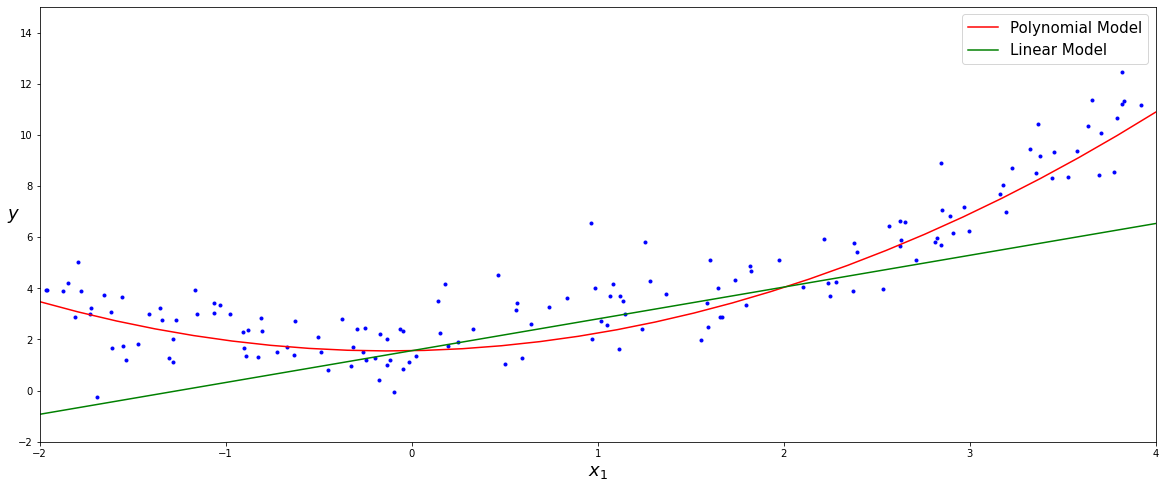

In [11]:
# Load Model's trained Parameters to plot it with the 
W_1 = poly_model.params['W'][:, 0]
W_2 = poly_model.params['W'][:, 1]
b = poly_model.params['b']
X_model = np.linspace(-2, 4, 30).reshape(30, 1) # use X_model to plot the line "naturally" :)

plt.figure(figsize=(20, 8))
plt.plot(X, y, "b.")
plt.plot(X_model, W_1*X_model + W_2*X_model**2 + b, c="r", ls='-', label='Polynomial Model')
plt.plot(X_model, W*X_model + b, c="g", ls='-', label='Linear Model')


plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-2, 4, -2, 15])
plt.legend(fontsize=15)
plt.show()

# Some things to remember
- This is called a different name but in general it's not thing different from the Linear one, just need to generate new polynomial features and all done. (If I build the previous Model will e
- The Previous Model was build wrongly. It run because in that situation, where the dataset has a linear contribution and only 1 feature, but things are often more complicated.
- I used the learning rate = 0.05, which I think is small, but in reality it really big, my model was diverged, it took me like an hour to figure out, because this learning rate work well with Linear Regression. Set the learning rate to 0.001 worked fine.